# Psychoinformatics - Week 13 (Examples)
by Tsung-Ren (Tren) Huang (trhuang@g.ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
from IPython.display import *
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 1 Regular Expression

### 1.0 Basic String Operations

In [2]:
a='This is a built-in module'
print(a.lower(),a.upper())
print(a.split(' '),a.split('-'))
print(a.find('built'),a[10:15])
print(a.replace('module','library'))
print(a.count('is'))
print(a.center(50,'='))

this is a built-in module THIS IS A BUILT-IN MODULE
['This', 'is', 'a', 'built-in', 'module'] ['This is a built', 'in module']
10 built
This is a built-in library
2
============This is a built-in module=============


### 1.1 Verification

In [3]:
print(bool(re.match('[A-Za-z]\d{9}','a123456789')))

True


In [4]:
print(bool(re.match('[^@]+@[^@]+\.[^@]+','a@b.c')))

True


### 1.2 Search, Match, & Find

In [5]:
regex=re.compile('abc',re.IGNORECASE)
for txt in ['abc','hello abc','hi AbC aBc']:
    print('-'*50)
    out=regex.search(txt) #inexact match
    if(out): print('search() found:',out.string)
    out=regex.match(txt) #exact match
    if(out): print('match() found:',out.string)
    out=regex.findall(txt) #search into a list
    if(out): print('findall() found:',out)

--------------------------------------------------
search() found: abc
match() found: abc
findall() found: ['abc']
--------------------------------------------------
search() found: hello abc
findall() found: ['abc']
--------------------------------------------------
search() found: hi AbC aBc
findall() found: ['AbC', 'aBc']


### 1.3 Analysis of retweets

In [6]:
tweets=['RT @spiketren  No class tomorrow','No class tomorrow (via @spiketren)']
rt=re.compile('(RT|via) (@\w+)')
#rt=re.compile('(RT|\(via) (@\w+\)*)')
for t in tweets:
    m=rt.search(t)
    #print(m.group(1),m.group(2));
    print(m[0],m[1],m[2]);

RT @spiketren RT @spiketren
via @spiketren via @spiketren


### 1.4 Revisiting ID verification
Check out <a href="https://zh.wikipedia.org/wiki/中華民國國民身分證">this page</a> for our ID rule.

In [7]:
id='a123456789'
conv={'A':10,'B':11,'C':12,'D':13,'E':14,'F':15,'G':16,
'H':17,'I':34,'J':18,'K':19,'L':20,'M':21,'N':22,'O':35,
'P':23,'Q':24,'R':25,'S':26,'T':27,'U':28,'V':29,'W':32,
'X':30,'Y':31,'Z':33}
parts=re.findall('\w',id)
region=str(conv[parts[0].upper()])
coef=np.array([1]+list(range(9,0,-1))+[1])
digits=np.array(list(region)+parts[1:],dtype=np.int)
if(np.mod(np.sum(coef*digits),10)==0): print('Valid!')

Valid!


### 1.5 Collection of email addresses

In [8]:
html='<body><b>test</b><img src=test.jpg></body>'
print(re.sub('<[^<]*>','',html))
e='@mail.ncku.edu.tw'
t='pichun_huang,chendy'
print(re.sub('\w+','\g<0>'+e,t))

test
pichun_huang@mail.ncku.edu.tw,chendy@mail.ncku.edu.tw


## 2 Natural Language Processing (NLP)

### 2.1 Lexical diversity & Big words

In [9]:
from nltk.book import text4 
print(len(set(text4))/len(text4)) # lexical diversity
long_words=[w for w in set(text4) if len(w)>15] 
print(len(long_words)) # number of big words

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
0.06692970116993173
18


### 2.2 Tokenization & Word distributions

['This is a cat.', 'That is a dog.']


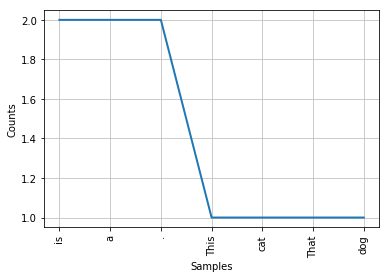

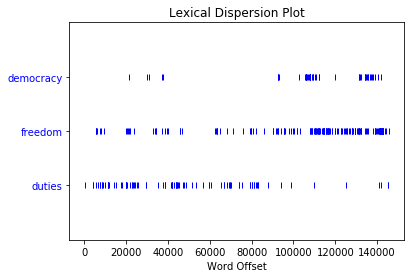

174
['of', 'the', 'and', 'to', 'that', 'which', 'by', ',', '.', 'a', 'in', 'it', 'be', 'is', 'for', 'our', 'we']


In [10]:
import nltk
mytxt='This is a cat. That is a dog.'
print(nltk.sent_tokenize(mytxt))
text=nltk.Text(nltk.word_tokenize(mytxt))
text.plot()
text4.dispersion_plot(['democracy','freedom','duties'])
dist=nltk.FreqDist(text4)
print(dist['freedom'])
print([w for w in dist.keys() if dist[w]>1000])

### 2.3 Term Frequency–Inverse Document Frequency (TF-IDF)

#### 2.3.1 Functions

In [11]:
import math
def tf(word, count): #count是一個word count的dictionary
    return count[word] / sum(count.values())
def nDoc_have(word, count_list):
    return sum(1 for count in count_list if word in count)
def idf(word, count_list):
    return math.log(len(count_list)) / (1 + nDoc_have(word, count_list))
def tfidf(word, count, count_list):
    return tf(word, count) * idf(word, count_list)

#### 2.3.2 Testing data

In [12]:
doc=['']*3
doc[0]=['a','a','b','c','d']
doc[1]=['a','b','b','c','d']
doc[2]=['a','b','c','c','d']

#construct word counts:
count = [{}, {}, {}]

for d in range(3):
    for word in doc[d]:
        if word not in count[d]:
            count[d][word]=1
        else:
            count[d][word]+=1
            
print(count)

[{'a': 2, 'b': 1, 'c': 1, 'd': 1}, {'a': 1, 'b': 2, 'c': 1, 'd': 1}, {'a': 1, 'b': 1, 'c': 2, 'd': 1}]


#### 2.3.3 TF-IDF

In [13]:
print(tfidf('a',count[0],count)) # "a" in the first document

0.10986122886681099


In [14]:
#print the tf-idf of each word in each documetes
keywords=[]
for d in range(3):
    print("Top words in document {}".format(d+1))
    scores={word: tfidf(word,count[d],count) for word in count[d]}
    sorted_words=sorted(scores.items(),key=lambda x:x[1],reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word,round(score,5)))
        #create a list of keywords:
        keywords+=word

Top words in document 1
	Word: a, TF-IDF: 0.10986
	Word: b, TF-IDF: 0.05493
	Word: c, TF-IDF: 0.05493
Top words in document 2
	Word: b, TF-IDF: 0.10986
	Word: a, TF-IDF: 0.05493
	Word: c, TF-IDF: 0.05493
Top words in document 3
	Word: c, TF-IDF: 0.10986
	Word: a, TF-IDF: 0.05493
	Word: b, TF-IDF: 0.05493


#### 2.3.4 TF-IDF-based document vectors

In [15]:
keywords=list(set(keywords)) #remove duplicates
print(keywords)

#create a feature vector for each document:
fv=['']*3
for d in range(3):
    idx=0 #feature index
    fv[d]=[tfidf(word,count[d],count) for word in keywords]
print(fv)

['c', 'b', 'a']
[[0.054930614433405495, 0.054930614433405495, 0.10986122886681099], [0.054930614433405495, 0.10986122886681099, 0.054930614433405495], [0.10986122886681099, 0.054930614433405495, 0.054930614433405495]]


### 2.4 Chinese "word" segementation

In [16]:
import jieba
text='結巴到底會不會成功地分解這行字呢?'
wordlist=jieba.cut(text,cut_all=False)
print("|".join(wordlist))
wordlist=jieba.cut(text,cut_all=True)
print("|".join(wordlist))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/nm/rdd1304x6657xgtykqd17d7c0000gn/T/jieba.cache
Loading model cost 0.960 seconds.
Prefix dict has been built succesfully.


結巴|到底|會不會|成功|地|分解|這行|字|呢|?
結|巴|到底|會|不|會|成功|地|分解|這|行|字|呢||


### 2.5 Word2Vec
Check <a href="https://github.com/RaRe-Technologies/gensim-data">this</a> & <a href="https://github.com/3Top/word2vec-api#where-to-get-a-pretrained-models">this</a> for more text datasets & pretained models.

#### 2.5.0 Train a model

In [17]:
import gensim
import gensim.downloader as api
corpus=api.load('text8')

In [19]:
model = gensim.models.word2vec.Word2Vec(corpus) # training

In [20]:
model.wv.most_similar("car") # testing

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('driver', 0.7922781705856323),
 ('cars', 0.7231026887893677),
 ('taxi', 0.7098619937896729),
 ('motorcycle', 0.7055505514144897),
 ('truck', 0.6891554594039917),
 ('vehicle', 0.6648487448692322),
 ('glider', 0.6545496582984924),
 ('passenger', 0.6500459313392639),
 ('racing', 0.6440917253494263),
 ('honda', 0.6335843801498413)]

#### 2.5.1 Man:King :: Woman:?

In [21]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7074302434921265),
 ('prince', 0.645684540271759),
 ('throne', 0.6272317171096802),
 ('empress', 0.6159641742706299),
 ('princess', 0.6122711896896362),
 ('son', 0.6090428829193115),
 ('daughter', 0.6034947633743286),
 ('aragon', 0.58876633644104),
 ('emperor', 0.577826738357544),
 ('mary', 0.5743823051452637)]

In [22]:
model.wv.most_similar_cosmul(positive=['woman', 'king'], negative=['man'])

[('queen', 0.9288182258605957),
 ('empress', 0.8831563591957092),
 ('prince', 0.8808987140655518),
 ('throne', 0.8728356957435608),
 ('princess', 0.8684437870979309),
 ('son', 0.8641836047172546),
 ('daughter', 0.8624863624572754),
 ('aragon', 0.8507594466209412),
 ('elizabeth', 0.849689781665802),
 ('mary', 0.8495608568191528)]

#### 2.5.2 Man:Doctor :: Woman:?

In [23]:
model.wv.most_similar(positive=['woman', 'doctor'], negative=['man'])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('nurse', 0.6201002597808838),
 ('teacher', 0.6023639440536499),
 ('child', 0.5961959362030029),
 ('physician', 0.5456038117408752),
 ('murderer', 0.5393767356872559),
 ('lawyer', 0.5358582139015198),
 ('prostitute', 0.5337344408035278),
 ('largo', 0.5291439294815063),
 ('wife', 0.5289161205291748),
 ('psychiatrist', 0.5251577496528625)]

#### 2.5.3 (Good + Best)/2 = Better ?

In [24]:
model.wv.word_vec('Good')

KeyError: "word 'Good' not in vocabulary"

In [25]:
what=(model.wv.word_vec('good')+model.wv.word_vec('best'))/2

In [26]:
model.wv.similar_by_vector(what)

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('best', 0.8687522411346436),
 ('good', 0.7972198724746704),
 ('better', 0.6251178979873657),
 ('bad', 0.5642905235290527),
 ('fun', 0.5096577405929565),
 ('finest', 0.48468104004859924),
 ('little', 0.48163706064224243),
 ('fair', 0.47919154167175293),
 ('helpful', 0.47699540853500366),
 ('worst', 0.47342175245285034)]

In [27]:
model.wv.most_similar(positive=['good', 'best'])

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('better', 0.6239095330238342),
 ('bad', 0.5960795879364014),
 ('fun', 0.5212955474853516),
 ('little', 0.4976400136947632),
 ('helpful', 0.49535930156707764),
 ('fair', 0.4932994842529297),
 ('poor', 0.4886171221733093),
 ('you', 0.476771742105484),
 ('job', 0.46857544779777527),
 ('wrong', 0.46552130579948425)]

In [28]:
model.wv.most_similar_cosmul(positive=['good', 'best'])

[('better', 0.5780989527702332),
 ('bad', 0.5439380407333374),
 ('fun', 0.5129193663597107),
 ('little', 0.49682560563087463),
 ('fair', 0.49521389603614807),
 ('helpful', 0.49410760402679443),
 ('poor', 0.48587217926979065),
 ('you', 0.4827499985694885),
 ('job', 0.48148393630981445),
 ('wrong', 0.4773350954055786)]

### 2.6 Topic Modeling

#### 2.6.0 Word ID & Dictionary

In [29]:
dictionary=gensim.corpora.Dictionary(corpus) # generate a dictionary from the text corpus

In [30]:
print(dictionary)
print(dictionary.doc2bow(['a', 'abacus', 'abilities', 'ability']))
corpus2=[dictionary.doc2bow(word) for word in corpus]

Dictionary(253854 unique tokens: ['a', 'abacus', 'abilities', 'ability', 'able']...)
[(0, 1), (1, 1), (2, 1), (3, 1)]


#### 2.6.1 Latent Dirichlet Allocation (LDA)

In [31]:
model=gensim.models.ldamodel.LdaModel(corpus2, num_topics=5, id2word=dictionary) #LDA training

In [32]:
model.print_topics(num_words=5)

[(0, '0.074*"the" + 0.035*"of" + 0.025*"and" + 0.024*"a" + 0.022*"in"'),
 (1, '0.057*"the" + 0.037*"of" + 0.025*"to" + 0.023*"a" + 0.021*"in"'),
 (2, '0.045*"the" + 0.034*"of" + 0.034*"one" + 0.024*"in" + 0.024*"nine"'),
 (3, '0.069*"the" + 0.035*"of" + 0.022*"in" + 0.020*"one" + 0.019*"to"'),
 (4, '0.055*"the" + 0.033*"and" + 0.031*"of" + 0.027*"one" + 0.019*"in"')]